# 1. Setup and Imports
## Import Libraries and Initialize Environment

In [71]:
!pip install scikit-learn pandas numpy matplotlib seaborn graphviz palmerpenguins

In [72]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import OneHotEncoder
from palmerpenguins import load_penguins
import matplotlib.pyplot as plt
import seaborn as sns
from graphviz import Source
from sklearn.tree import export_graphviz
import os

# Set random seed for reproducibility
RANDOM_STATE = 42

# Create directory for saving images
if not os.path.exists('images'):
    os.makedirs('images')

# 2.1 Preparing the Datasets
## Load and Preprocess the Palmer Penguins Dataset

In [73]:
# Load Palmer Penguins dataset
df = load_penguins()

# Display dataset information
print("Dataset Info:")
print(df.info())
print("\nFirst 5 Rows:")
print(df.head())
print("\nMissing Values:")
print(df.isnull().sum())

# Handle missing values
df = df.dropna()

# Separate features and labels
X = df.drop('species', axis=1)  # Features
y = df['species']  # Labels

# Apply one-hot encoding
categorical_cols = X.select_dtypes(include=['object']).columns
X = pd.get_dummies(X, columns=categorical_cols, drop_first=True)
print("\nFeatures after One-Hot Encoding:")
print(X.head())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
 7   year               344 non-null    int64  
dtypes: float64(4), int64(1), object(3)
memory usage: 21.6+ KB
None

First 5 Rows:
  species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen            39.1           18.7              181.0   
1  Adelie  Torgersen            39.5           17.4              186.0   
2  Adelie  Torgersen            40.3           18.0              195.0   
3  Adelie  Torgersen   

##  Shuffling and splitting the dataset into train/test Sets

In [74]:
# Define train/test proportions
splits = [(0.4, 0.6), (0.6, 0.4), (0.8, 0.2), (0.9, 0.1)]
datasets = {}

for train_size, test_size in splits:
    #  shuffle the dataset before splitting
    X_train, X_test, y_train, y_test = train_test_split(
        X, y,
        train_size=train_size,
        test_size=test_size,
        stratify=y,
        shuffle=True,
        random_state = RANDOM_STATE
    )
    datasets[f'{int(train_size*100)}-{int(test_size*100)}'] = {
        'feature_train': X_train,
        'label_train': y_train,
        'feature_test': X_test,
        'label_test': y_test
    }
    print(f"\nSplit {int(train_size*100)}/{int(test_size*100)}:")
    print(f"Training samples: {len(X_train)}, Test samples: {len(X_test)}")


Split 40/60:
Training samples: 133, Test samples: 200

Split 60/40:
Training samples: 199, Test samples: 134

Split 80/20:
Training samples: 266, Test samples: 67

Split 90/10:
Training samples: 299, Test samples: 34


## Visualizing the class distributions

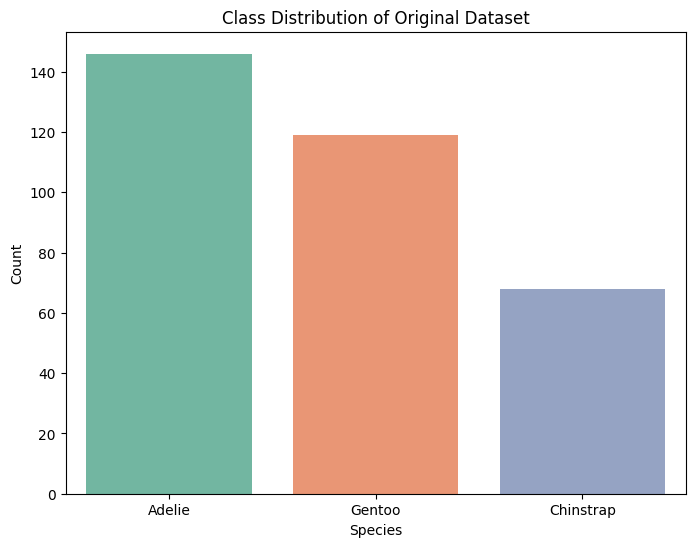

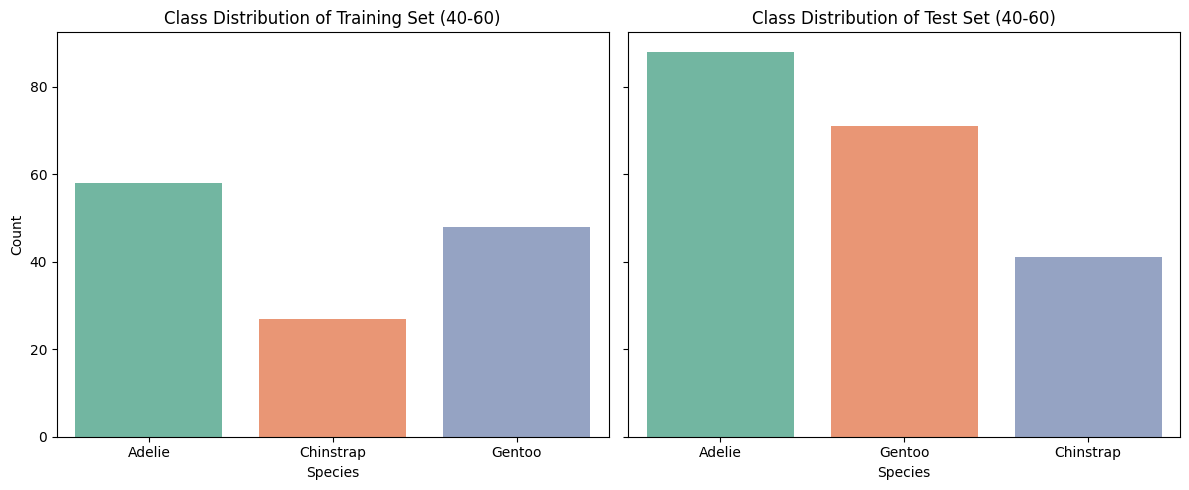

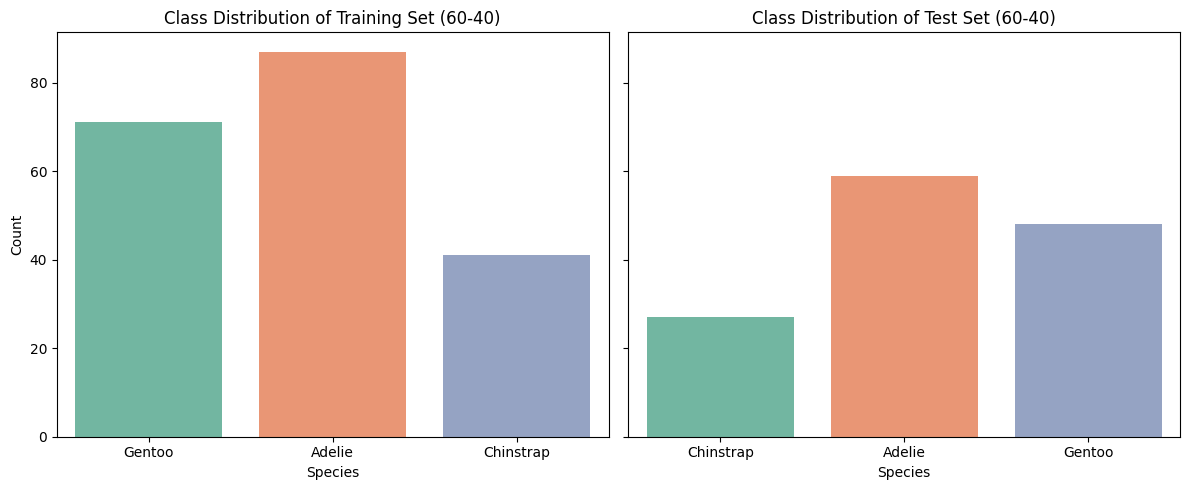

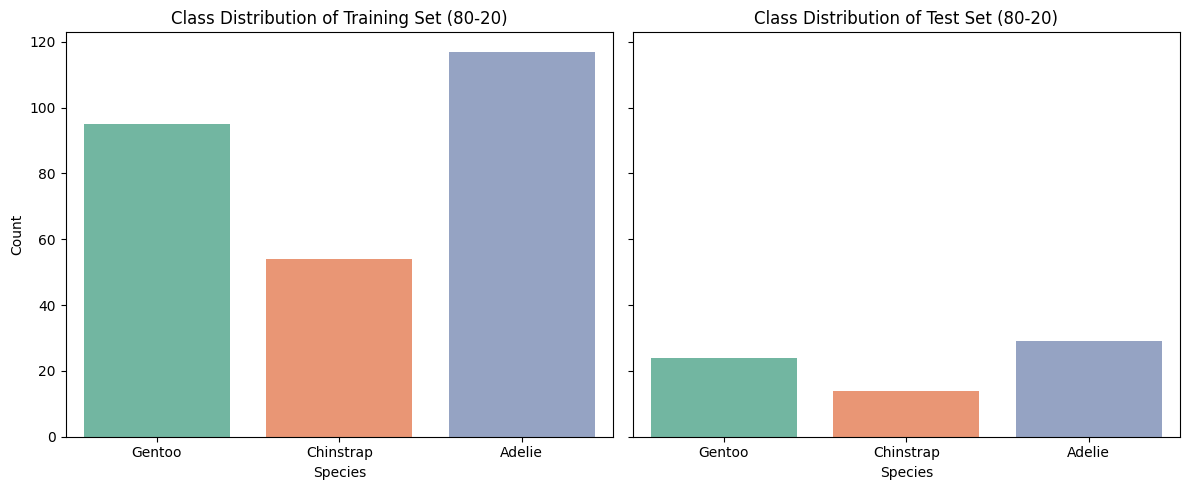

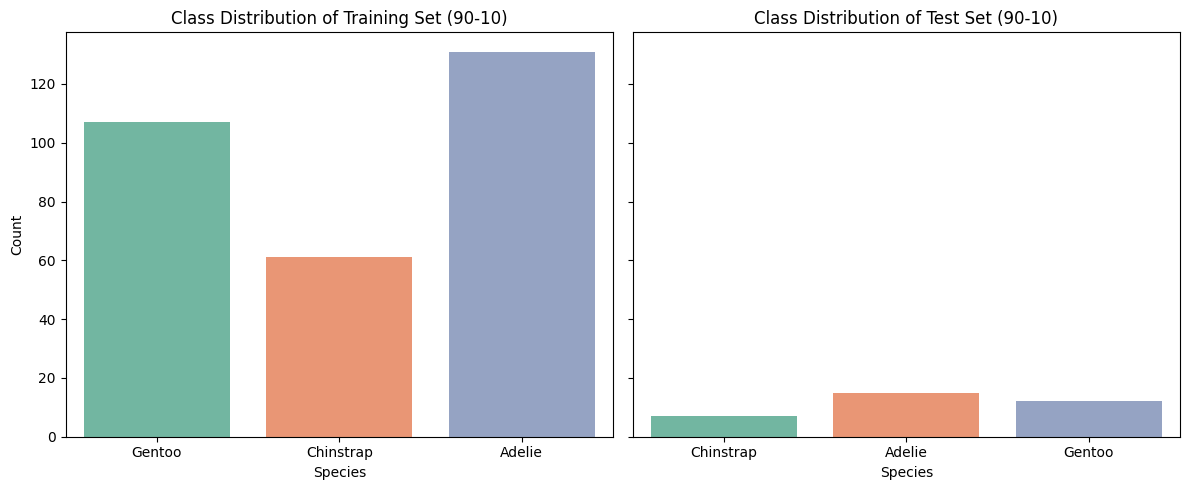

In [75]:
colors = sns.color_palette("Set2", n_colors=3)

def plot_class_distribution(y_train, y_test, title_train, title_test, filename):
    # Create a figure with two subplots side by side
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5), sharey=True)

    # Plot training set distribution
    sns.countplot(x=y_train, hue=y_train, order=y_train.unique(), palette=colors, ax=ax1, legend=False)
    ax1.set_title(title_train)
    ax1.set_xlabel('Species')
    ax1.set_ylabel('Count')

    # Plot test set distribution
    sns.countplot(x=y_test, hue=y_test, order=y_test.unique(), palette=colors, ax=ax2, legend=False)
    ax2.set_title(title_test)
    ax2.set_xlabel('Species')
    ax2.set_ylabel('Count')

    # Adjust layout to prevent overlap
    plt.tight_layout()

    # Save the combined plot
    plt.savefig(f'images/{filename}.png')
    plt.show()

# Original dataset
plt.figure(figsize=(8, 6))
sns.countplot(x=y, hue=y, order=y.unique(), palette=colors, legend=False)
plt.title('Class Distribution of Original Dataset')
plt.xlabel('Species')
plt.ylabel('Count')
plt.savefig('images/original_class_distribution.png')
plt.show()

# Train/test splits
for split_name, data in datasets.items():
    plot_class_distribution(
        data['label_train'],
        data['label_test'],
        f'Class Distribution of Training Set ({split_name})',
        f'Class Distribution of Test Set ({split_name})',
        f'class_distribution_{split_name}'
    )

## Store trained models

In [76]:
models = {}

for split_name, data in datasets.items():
    # Initialize classifier
    clf = DecisionTreeClassifier(criterion='entropy', random_state = RANDOM_STATE)
    # Train on training set
    clf.fit(data['feature_train'], data['label_train'])
    models[split_name] = clf

# 2.2 Building the decision tree classifiers
## Define visualization function

In [77]:
def visualize_tree(clf, feature_names, class_names, title, filename):
    dot_data = export_graphviz(
        clf, out_file=None,
        feature_names=feature_names,
        class_names=class_names,
        filled=True, rounded=True
    )
    graph = Source(dot_data)
    graph.render(f'images/{filename}.gv', view=False, format='png')
    return graph

# Decision tree for 40-60 split

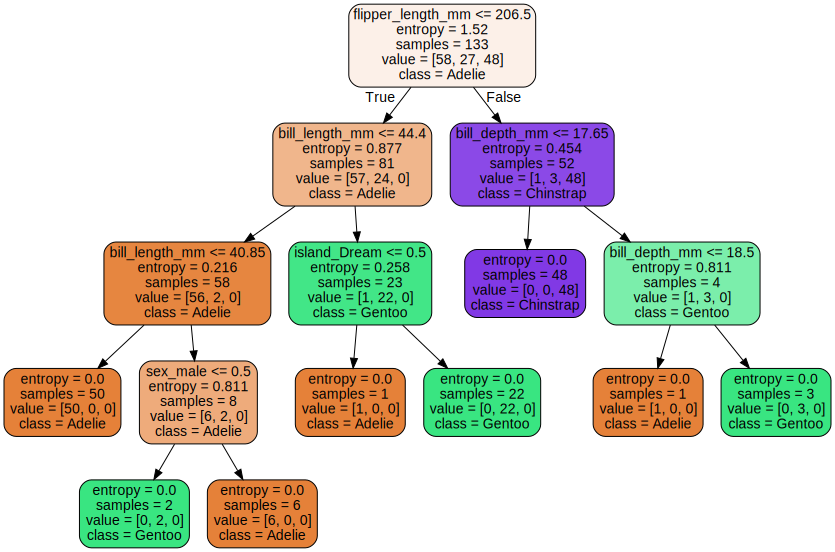

In [78]:
# Initialize and train classifier
clf_40_60 = DecisionTreeClassifier(criterion='entropy', random_state = RANDOM_STATE)
clf_40_60.fit(datasets['40-60']['feature_train'], datasets['40-60']['label_train'])

# Visualize tree
visualize_tree(
    clf_40_60,
    feature_names=X.columns,
    class_names=y.unique(),
    title='Decision Tree (40-60 Split)',
    filename='decision_tree_40-60'
)

# Decision tree for 60-40 split

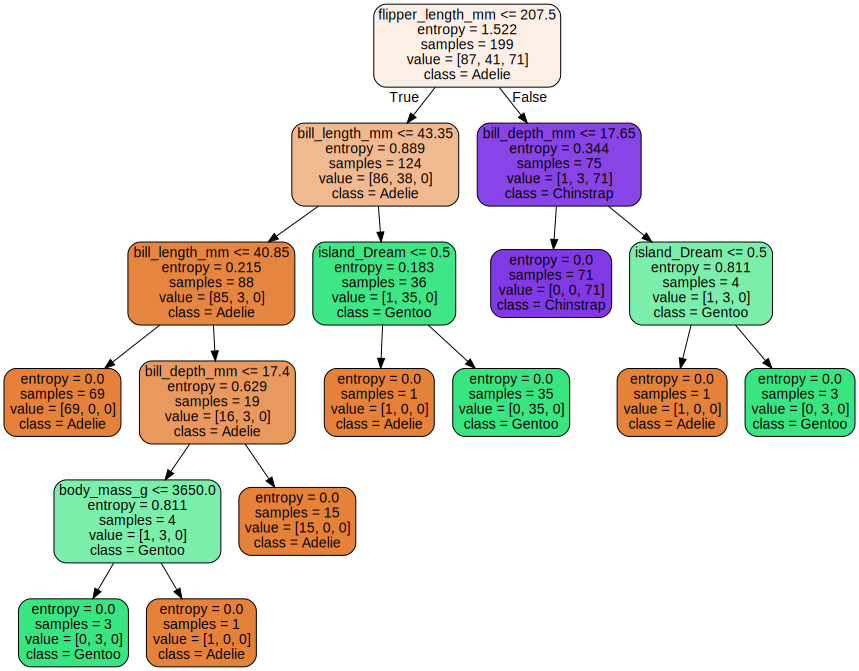

In [79]:
# Initialize and train classifier
clf_60_40 = DecisionTreeClassifier(criterion='entropy', random_state = RANDOM_STATE)
clf_60_40.fit(datasets['60-40']['feature_train'], datasets['60-40']['label_train'])

# Visualize tree
visualize_tree(
    clf_60_40,
    feature_names=X.columns,
    class_names=y.unique(),
    title='Decision Tree (60-40 Split)',
    filename='decision_tree_60-40'
)

# Decision tree for 80-20 split

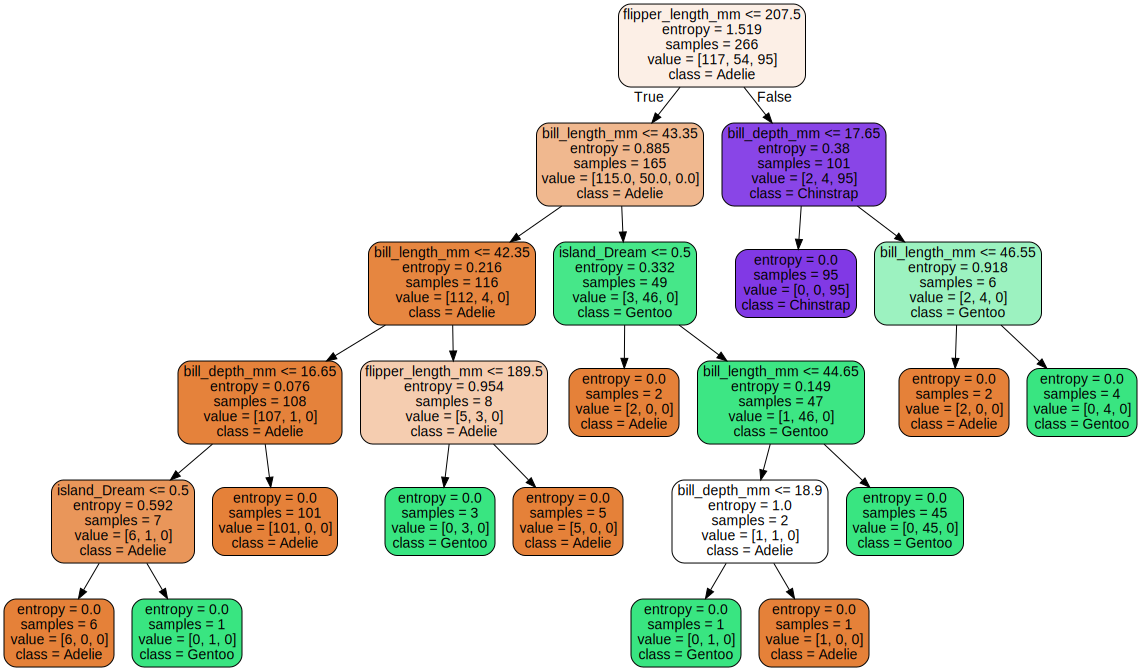

In [80]:
# Initialize and train classifier
clf_80_20 = DecisionTreeClassifier(criterion='entropy', random_state = RANDOM_STATE)
clf_80_20.fit(datasets['80-20']['feature_train'], datasets['80-20']['label_train'])

# Visualize tree
visualize_tree(
    clf_80_20,
    feature_names=X.columns,
    class_names=y.unique(),
    title='Decision Tree (80-20 Split)',
    filename='decision_tree_80-20'
)

# Decision tree for 90-10 split

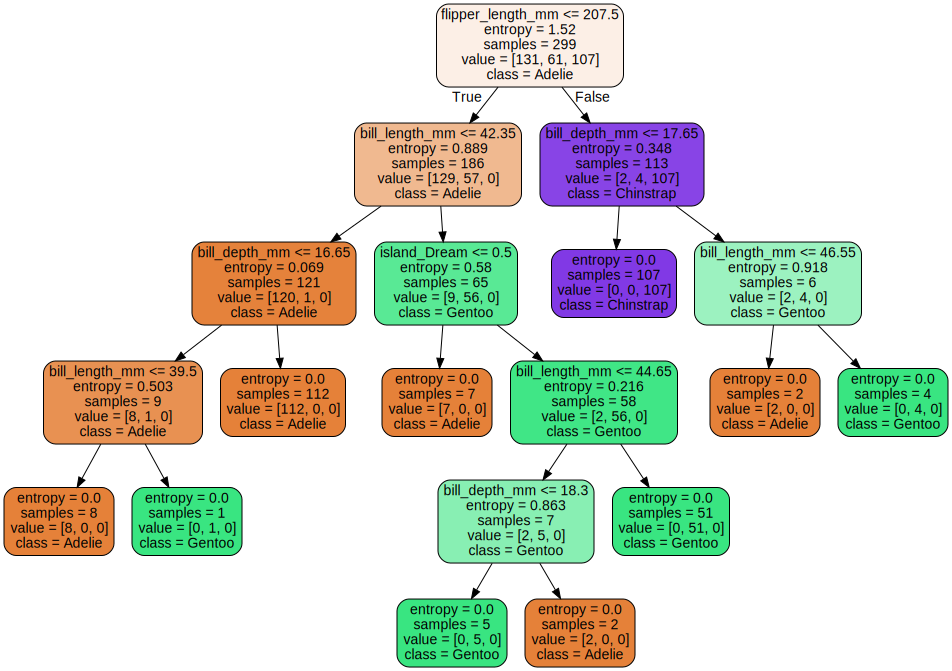

In [81]:
# Initialize and train classifier
clf_90_10 = DecisionTreeClassifier(criterion='entropy', random_state = RANDOM_STATE)
clf_90_10.fit(datasets['90-10']['feature_train'], datasets['90-10']['label_train'])

# Visualize tree
visualize_tree(
    clf_90_10,
    feature_names=X.columns,
    class_names=y.unique(),
    title='Decision Tree (90-10 Split)',
    filename='decision_tree_90-10'
)

# 2.3 Evaluating the Decision Tree Classifiers
## Evaluation for 40-60 split

Classification report (40-60 Split):
              precision    recall  f1-score   support

      Adelie       0.99      0.95      0.97        88
   Chinstrap       0.91      1.00      0.95        41
      Gentoo       1.00      0.99      0.99        71

    accuracy                           0.97       200
   macro avg       0.97      0.98      0.97       200
weighted avg       0.98      0.97      0.98       200



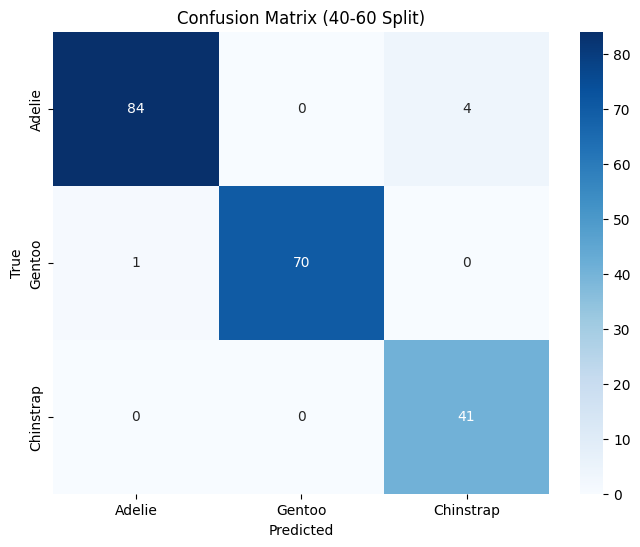

In [82]:
# Predict on test set
y_pred_40_60 = clf_40_60.predict(datasets['40-60']['feature_test'])

# Classification report
print("Classification report (40-60 Split):")
print(classification_report(datasets['40-60']['label_test'], y_pred_40_60))

# Confusion matrix
cm_40_60 = confusion_matrix(datasets['40-60']['label_test'], y_pred_40_60, labels=y.unique())
plt.figure(figsize=(8, 6))
sns.heatmap(cm_40_60, annot=True, fmt='d', cmap='Blues',
            xticklabels=y.unique(), yticklabels=y.unique())
plt.title('Confusion Matrix (40-60 Split)')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.savefig('images/confusion_matrix_40-60.png')
plt.show()

## Evaluation for 60-40 split

Classification report (60-40 Split):
              precision    recall  f1-score   support

      Adelie       0.97      0.97      0.97        59
   Chinstrap       0.93      1.00      0.96        27
      Gentoo       1.00      0.96      0.98        48

    accuracy                           0.97       134
   macro avg       0.97      0.97      0.97       134
weighted avg       0.97      0.97      0.97       134



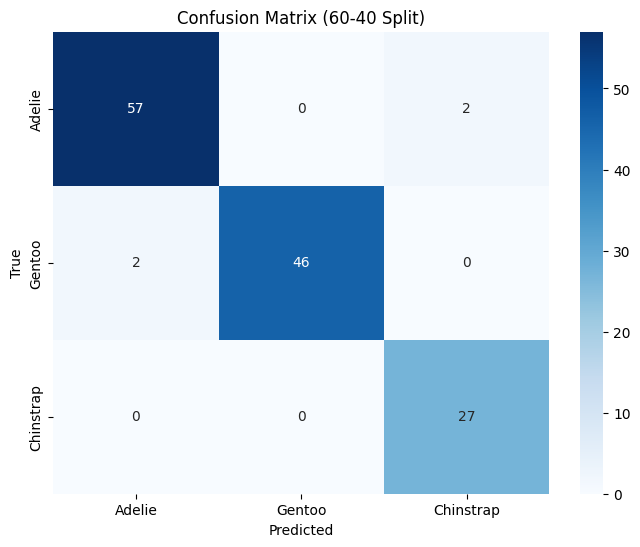

In [83]:
# Predict on test set
y_pred_60_40 = clf_60_40.predict(datasets['60-40']['feature_test'])

# Classification report
print("Classification report (60-40 Split):")
print(classification_report(datasets['60-40']['label_test'], y_pred_60_40))

# Confusion matrix
cm_60_40 = confusion_matrix(datasets['60-40']['label_test'], y_pred_60_40, labels=y.unique())
plt.figure(figsize=(8, 6))
sns.heatmap(cm_60_40, annot=True, fmt='d', cmap='Blues',
            xticklabels=y.unique(), yticklabels=y.unique())
plt.title('Confusion Matrix (60-40 Split)')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.savefig('images/confusion_matrix_60-40.png')
plt.show()

## Evaluation for 80-20 split

Classification report (80-20 Split):
              precision    recall  f1-score   support

      Adelie       0.93      0.90      0.91        29
   Chinstrap       0.82      1.00      0.90        14
      Gentoo       1.00      0.92      0.96        24

    accuracy                           0.93        67
   macro avg       0.92      0.94      0.92        67
weighted avg       0.93      0.93      0.93        67



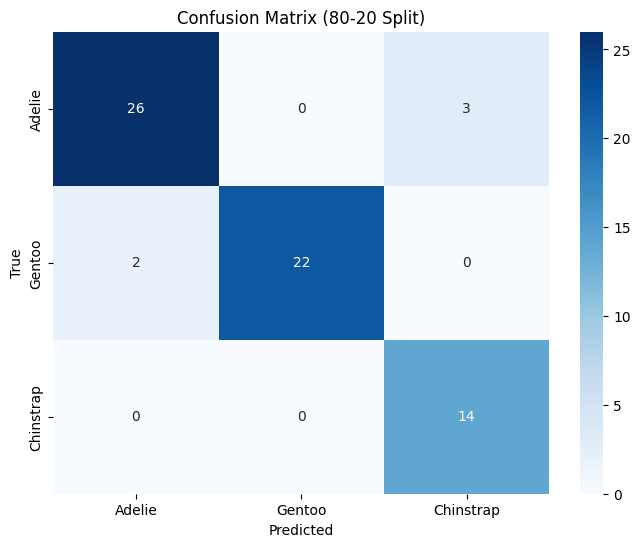

In [84]:
# Predict on test set
y_pred_80_20 = clf_80_20.predict(datasets['80-20']['feature_test'])

# Classification report
print("Classification report (80-20 Split):")
print(classification_report(datasets['80-20']['label_test'], y_pred_80_20))

# Confusion matrix
cm_80_20 = confusion_matrix(datasets['80-20']['label_test'], y_pred_80_20, labels=y.unique())
plt.figure(figsize=(8, 6))
sns.heatmap(cm_80_20, annot=True, fmt='d', cmap='Blues',
            xticklabels=y.unique(), yticklabels=y.unique())
plt.title('Confusion Matrix (80-20 Split)')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.savefig('images/confusion_matrix_80-20.png')
plt.show()

## Evaluation for 90-10 split

Classification report (90-10 Split):
              precision    recall  f1-score   support

      Adelie       0.88      1.00      0.94        15
   Chinstrap       1.00      1.00      1.00         7
      Gentoo       1.00      0.83      0.91        12

    accuracy                           0.94        34
   macro avg       0.96      0.94      0.95        34
weighted avg       0.95      0.94      0.94        34



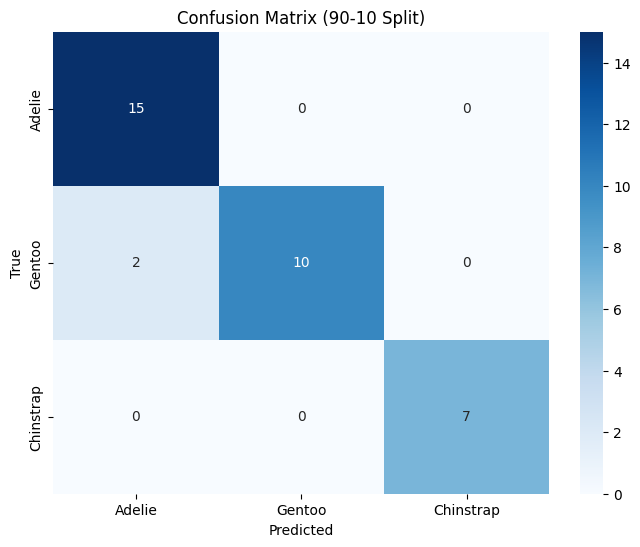

In [85]:
# Predict on test set
y_pred_90_10 = clf_90_10.predict(datasets['90-10']['feature_test'])

# Classification report
print("Classification report (90-10 Split):")
print(classification_report(datasets['90-10']['label_test'], y_pred_90_10))

# Confusion matrix
cm_90_10 = confusion_matrix(datasets['90-10']['label_test'], y_pred_90_10, labels=y.unique())
plt.figure(figsize=(8, 6))
sns.heatmap(cm_90_10, annot=True, fmt='d', cmap='Blues',
            xticklabels=y.unique(), yticklabels=y.unique())
plt.title('Confusion Matrix (90-10 Split)')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.savefig('images/confusion_matrix_90-10.png')
plt.show()

## Interpretation and insights

In [86]:
# Feature importance for each split
for split_name in datasets.keys():
    print(f"\nFeature Importance for {split_name} Split:")
    clf = globals()[f'clf_{split_name.replace("-", "_")}']
    for feature, importance in zip(X.columns, clf.feature_importances_):
        print(f"{feature}: {importance:.4f}")


Feature Importance for 40-60 Split:
bill_length_mm: 0.2899
bill_depth_mm: 0.1167
flipper_length_mm: 0.5320
body_mass_g: 0.0000
year: 0.0000
island_Dream: 0.0294
island_Torgersen: 0.0000
sex_male: 0.0321

Feature Importance for 60-40 Split:
bill_length_mm: 0.3028
bill_depth_mm: 0.1031
flipper_length_mm: 0.5509
body_mass_g: 0.0107
year: 0.0000
island_Dream: 0.0325
island_Torgersen: 0.0000
sex_male: 0.0000

Feature Importance for 80-20 Split:
bill_length_mm: 0.3079
bill_depth_mm: 0.0963
flipper_length_mm: 0.5625
body_mass_g: 0.0000
year: 0.0000
island_Dream: 0.0333
island_Torgersen: 0.0000
sex_male: 0.0000

Feature Importance for 90-10 Split:
bill_length_mm: 0.2989
bill_depth_mm: 0.0962
flipper_length_mm: 0.5496
body_mass_g: 0.0000
year: 0.0000
island_Dream: 0.0554
island_Torgersen: 0.0000
sex_male: 0.0000


# 2.4 The Depth and Accuracy of a Decision Tree
## Set up for 80/20 split


In [87]:
X_train = datasets['80-20']['feature_train']
y_train = datasets['80-20']['label_train']
X_test = datasets['80-20']['feature_test']
y_test = datasets['80-20']['label_test']

## Decision Tree with max_depth = None

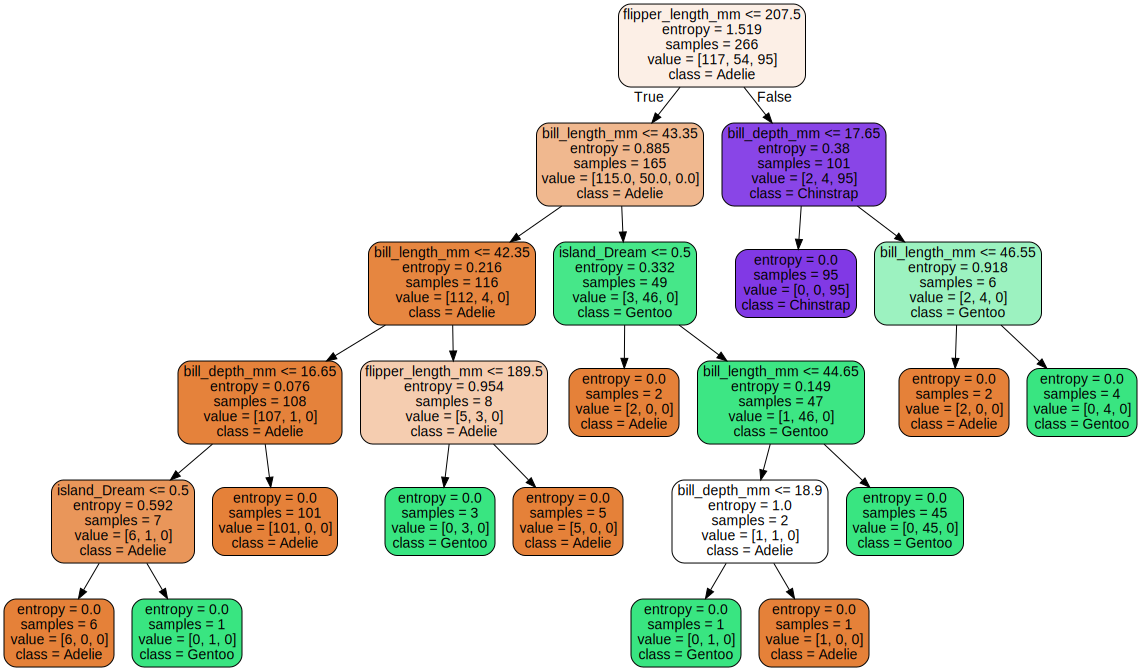

In [88]:
# Train and evaluate
clf_depth_none = DecisionTreeClassifier(criterion='entropy', max_depth=None, random_state = RANDOM_STATE)
clf_depth_none.fit(X_train, y_train)
y_pred_none = clf_depth_none.predict(X_test)
acc_none = accuracy_score(y_test, y_pred_none)

# Visualize
visualize_tree(
    clf_depth_none,
    feature_names=X.columns,
    class_names=y.unique(),
    title='Decision Tree (max_depth=None)',
    filename='decision_tree_80-20_depth_none'
)

## Decision Tree with max_depth = 2

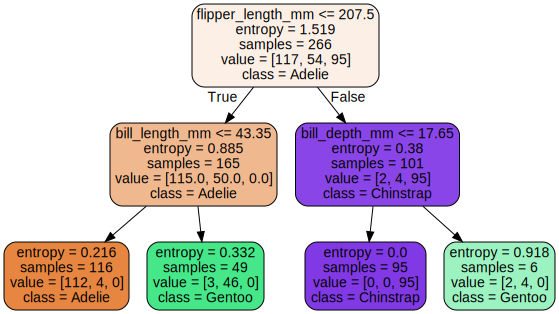

In [89]:
# Train and evaluate
clf_depth_2 = DecisionTreeClassifier(criterion='entropy', max_depth=2, random_state = RANDOM_STATE)
clf_depth_2.fit(X_train, y_train)
y_pred_2 = clf_depth_2.predict(X_test)
acc_2 = accuracy_score(y_test, y_pred_2)

# Visualize
visualize_tree(
    clf_depth_2,
    feature_names=X.columns,
    class_names=y.unique(),
    title='Decision Tree (max_depth=2)',
    filename='decision_tree_80-20_depth_2'
)

## Decision Tree with max_depth = 3

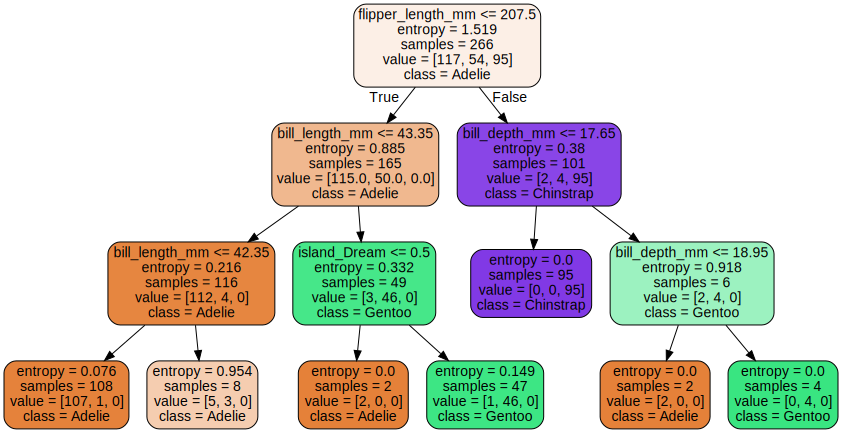

In [90]:
# Train and evaluate
clf_depth_3 = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state = RANDOM_STATE)
clf_depth_3.fit(X_train, y_train)
y_pred_3 = clf_depth_3.predict(X_test)
acc_3 = accuracy_score(y_test, y_pred_3)

# Visualize
visualize_tree(
    clf_depth_3,
    feature_names=X.columns,
    class_names=y.unique(),
    title='Decision Tree (max_depth=3)',
    filename='decision_tree_80-20_depth_3'
)

## Decision Tree with max_depth=4

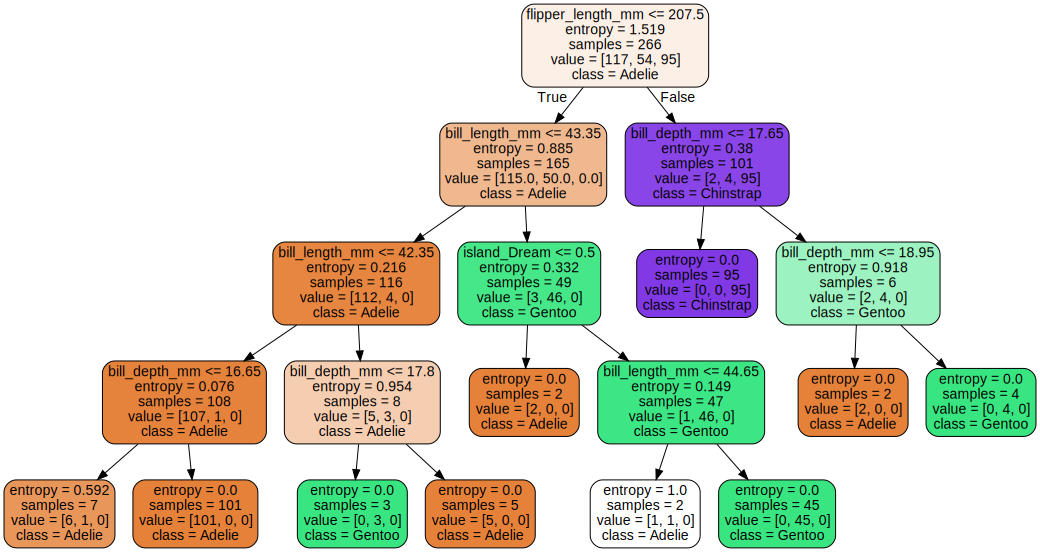

In [91]:
# Train and evaluate
clf_depth_4 = DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state = RANDOM_STATE)
clf_depth_4.fit(X_train, y_train)
y_pred_4 = clf_depth_4.predict(X_test)
acc_4 = accuracy_score(y_test, y_pred_4)

# Visualize
visualize_tree(
    clf_depth_4,
    feature_names=X.columns,
    class_names=y.unique(),
    title='Decision Tree (max_depth=4)',
    filename='decision_tree_80-20_depth_4'
)

## Decision Tree with max_depth = 5

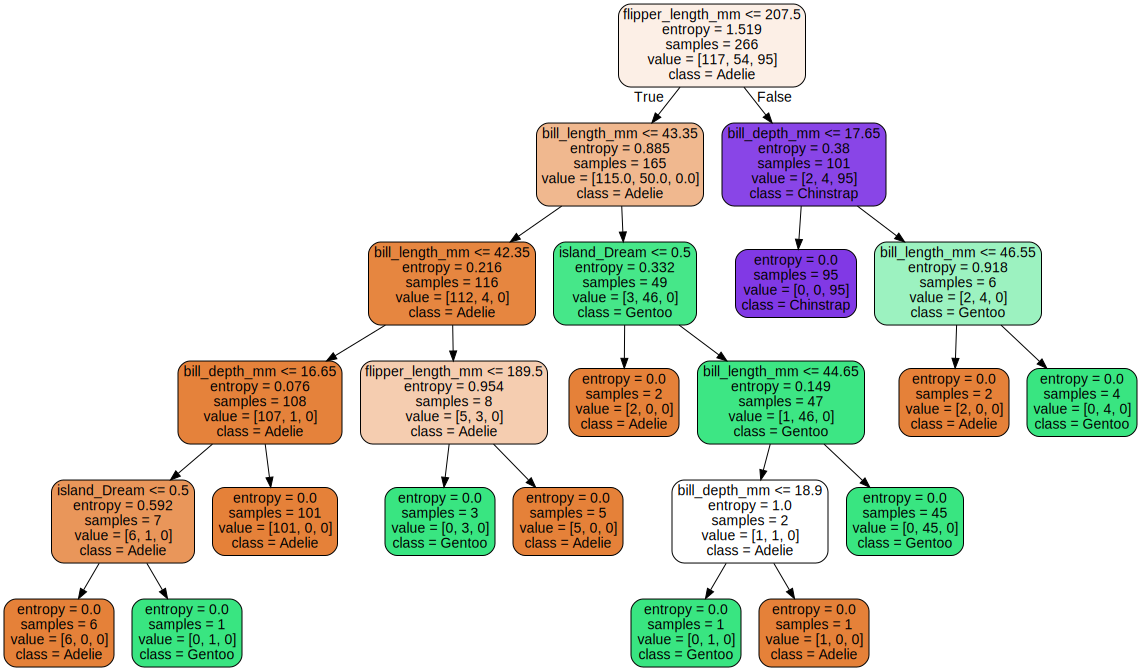

In [92]:
# Train and evaluate
clf_depth_5 = DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state = RANDOM_STATE)
clf_depth_5.fit(X_train, y_train)
y_pred_5 = clf_depth_5.predict(X_test)
acc_5 = accuracy_score(y_test, y_pred_5)

# Visualize
visualize_tree(
    clf_depth_5,
    feature_names=X.columns,
    class_names=y.unique(),
    title='Decision Tree (max_depth=5)',
    filename='decision_tree_80-20_depth_5'
)

## Decision Tree with max_depth = 6

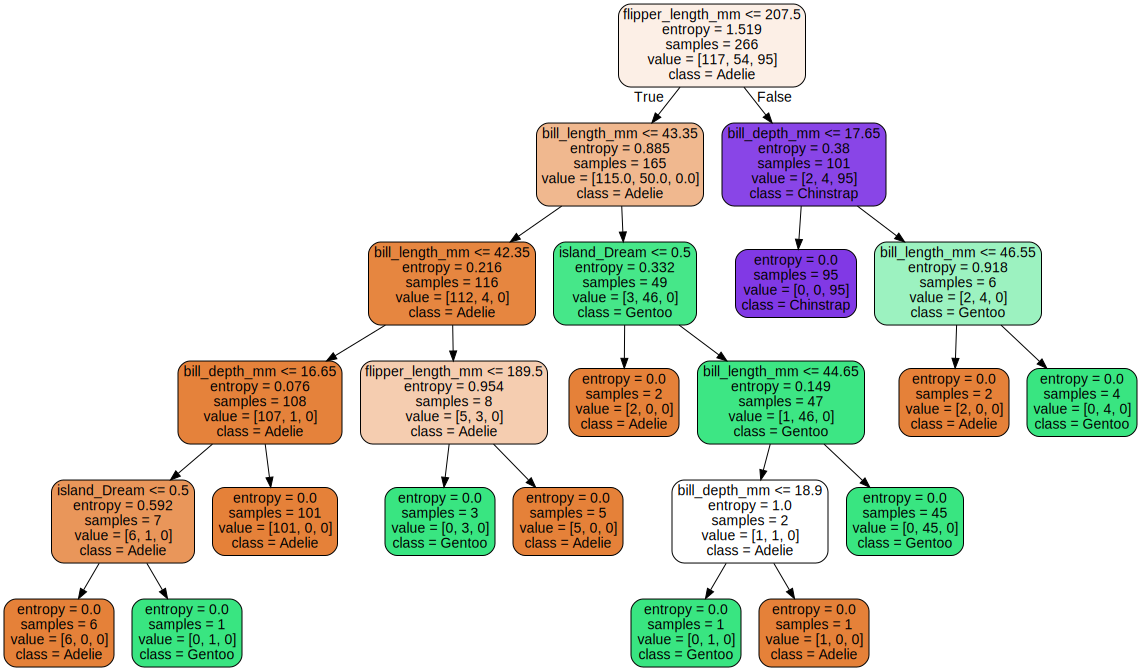

In [93]:
# Train and evaluate
clf_depth_6 = DecisionTreeClassifier(criterion='entropy', max_depth=6, random_state = RANDOM_STATE)
clf_depth_6.fit(X_train, y_train)
y_pred_6 = clf_depth_6.predict(X_test)
acc_6 = accuracy_score(y_test, y_pred_6)

# Visualize
visualize_tree(
    clf_depth_6,
    feature_names=X.columns,
    class_names=y.unique(),
    title='Decision Tree (max_depth=6)',
    filename='decision_tree_80-20_depth_6'
)

## Decision Tree with max_depth = 7

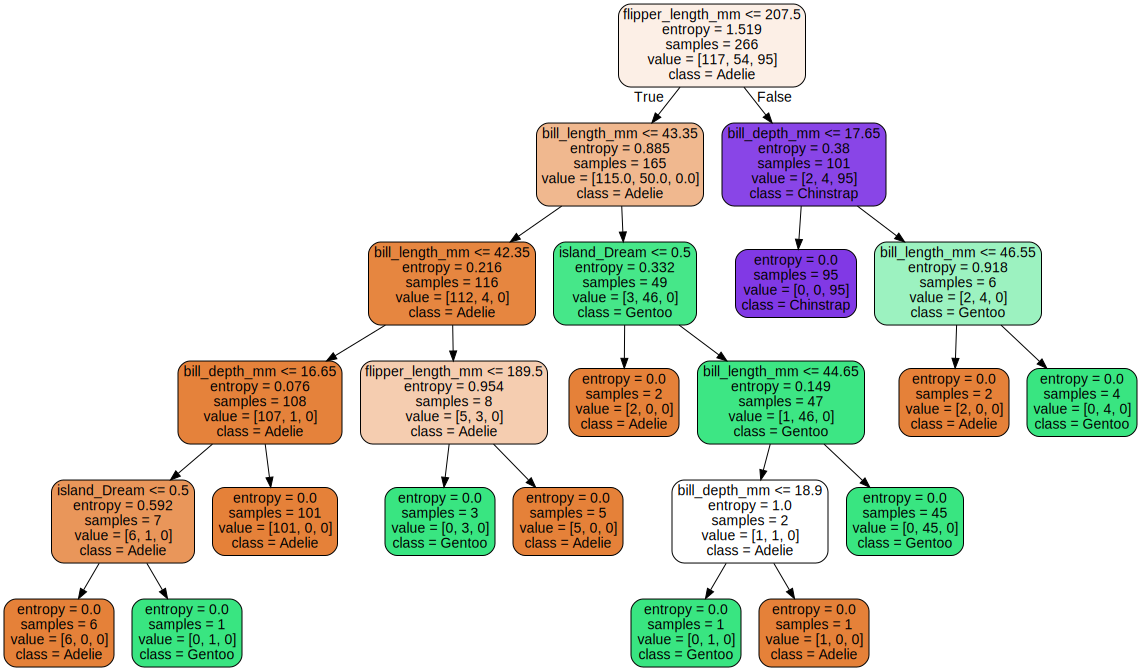

In [94]:
# Train and evaluate
clf_depth_7 = DecisionTreeClassifier(criterion='entropy', max_depth=7, random_state = RANDOM_STATE)
clf_depth_7.fit(X_train, y_train)
y_pred_7 = clf_depth_7.predict(X_test)
acc_7 = accuracy_score(y_test, y_pred_7)

# Visualize
visualize_tree(
    clf_depth_7,
    feature_names=X.columns,
    class_names=y.unique(),
    title='Decision Tree (max_depth=7)',
    filename='decision_tree_80-20_depth_7'
)

## Accuracy Table

In [95]:
# Create accuracy table
depth_results = {
    'max_depth': ['None', 2, 3, 4, 5, 6, 7],
    'accuracy': [acc_none, acc_2, acc_3, acc_4, acc_5, acc_6, acc_7]
}
depth_df = pd.DataFrame(depth_results)
print("\nAccuracy vs Max Depth (80/20 Split):")
print(depth_df.to_markdown(index=False))


Accuracy vs Max Depth (80/20 Split):
| max_depth   |   accuracy |
|:------------|-----------:|
| None        |   0.925373 |
| 2           |   0.940299 |
| 3           |   0.955224 |
| 4           |   0.955224 |
| 5           |   0.925373 |
| 6           |   0.925373 |
| 7           |   0.925373 |


## Plot Accuracy vs. Depth

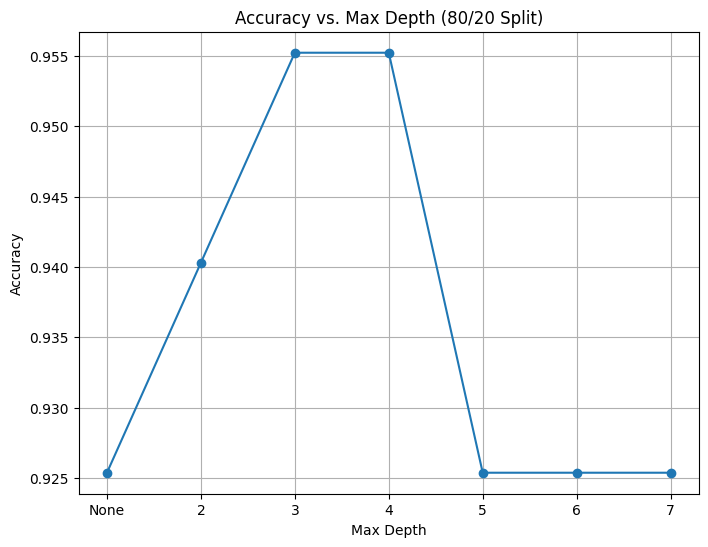

In [96]:
plt.figure(figsize=(8, 6))
plt.plot(depth_df['max_depth'].astype(str), depth_df['accuracy'], marker='o')
plt.title('Accuracy vs. Max Depth (80/20 Split)')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.grid(True)
plt.savefig('images/accuracy_vs_depth_80-20.png')
plt.show()